In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
X = np.loadtxt("simple.txt")

# Plot the data points

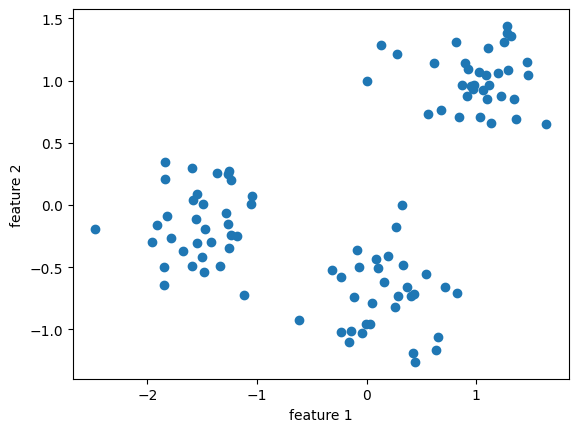

X.shape: (101, 2)
X.dtype: float64
X[0, :]: [0. 1.]


In [8]:
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

print(f"X.shape: {X.shape}") # check the data size
print(f"X.dtype: {X.dtype}") # check the data type
print(f"X[0, :]: {X[0, :]}") # check the data elements in the 1st row

# KMeans clustering

In [9]:
def K_Means(K, X, max_iter):
    n,d = X.shape
    centroids = X[np.random.permutation(n)[:K]].reshape(1,K,d) # initialise cluster centres as random data points
    loss = [] # keep track of kmeans objective value

    iteration = 0
    changed = True
    while changed and iteration < max_iter:  

        # step 1 - cluster assignment
        distances = np.zeros([n,K])
        for k in range(K):
            distances[:,k] = np.linalg.norm(X-centroids[iteration,k], axis=1)
        cluster_assignment = np.argmin(distances,axis=1) 

        loss += [np.sum(X - centroids[-1][cluster_assignment])**2] # how "bad" is this cluster assignment?

        # step 2 - update cluster centres
        new_centroids = np.zeros([K,d])
        for k in range(K):
            new_centroids[k] = np.mean(X[cluster_assignment == k], axis=0)  
        centroids = np.concatenate([centroids, new_centroids.reshape(1,K,d)], axis=0)
        
        # check converged
        if np.linalg.norm(centroids[-1] - centroids[-2]) < 1e-6:
            changed = False

        iteration += 1

    loss += [np.sum(X - centroids[-1][cluster_assignment])**2] # compute final loss
    return centroids, cluster_assignment, iteration, loss

# Cluster the data

In [10]:
K=3
centroids, cluster_assignments, iters, loss = K_Means(K, X, max_iter = 20) 
print(f"iters: {iters}")

# try differnt no of max iterations 
# also try changing the K values

iters: 3


# plot the data with cluster colouring

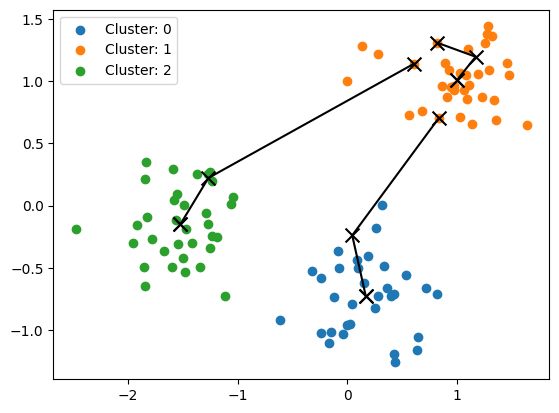

In [11]:
plt.figure()
for k in range(K):
    plt.scatter(X[cluster_assignments==k,0], X[cluster_assignments==k,1], label=f"Cluster: {k}")

# plot cluster centres
for i in range(iters+1):
    plt.scatter(centroids[i,:,0],centroids[i,:,1], marker="x", color="k", s=100)

# show trajectory of cluster centres
for i in range(iters):
    for k in range(K):
        plt.plot([centroids[i,k,0],centroids[i+1,k,0]], [centroids[i,k,1],centroids[i+1,k,1]], c="k")

plt.legend()
plt.show()

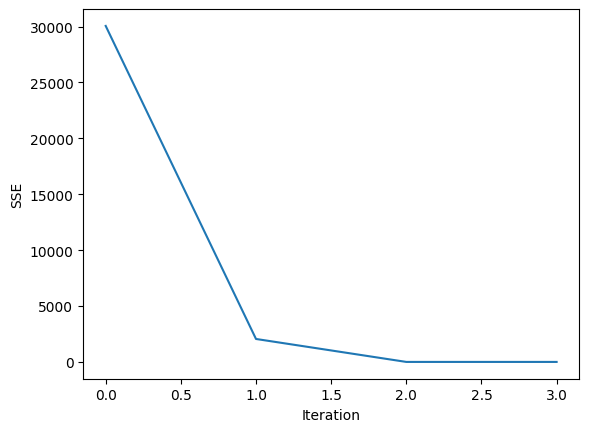

In [12]:
# kmeans objective function
plt.figure()
plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("SSE")
plt.show()

# fish dataset

In [13]:
data = pd.read_csv("fish.txt", sep="\s+")
X = np.array(data.iloc[:,1:]) # Leave the first coloumn and convert to numpy array
y = data.iloc[:,0]

print(f"X.shape: {X.shape}") # how many examples and how many features?

X.shape: (85, 6)


# plot fish data

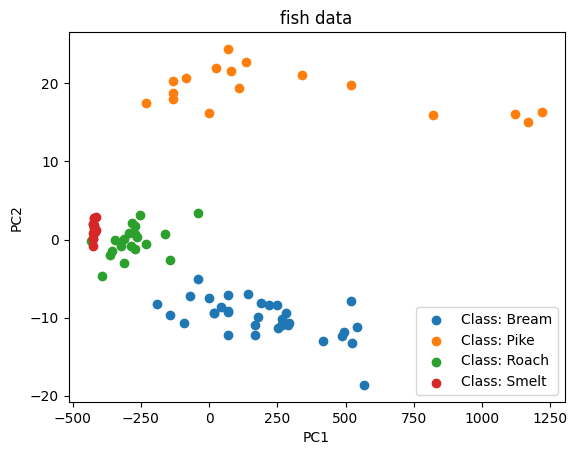

In [14]:
# need to reduce dimension to 2 for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduc = pca.fit_transform(X)

plt.figure()
for lab in np.unique(y):
    plt.scatter(X_reduc[y==lab,0], X_reduc[y==lab,1], label=f"Class: {lab}")
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("fish data")
plt.show()

# cluster original data (6 features)

In [15]:
K=4
centroids, cluster_assignments, iters, loss = K_Means(K, X, max_iter = 20) 
print(f"iter: {iters}")

# put centroids into 2d space
centroids_reduc = np.zeros([centroids.shape[0],centroids.shape[1],2])
for i in range(iters+1):
    centroids_reduc[i] = pca.transform(centroids[i])

iter: 8


# plot the results from clustering

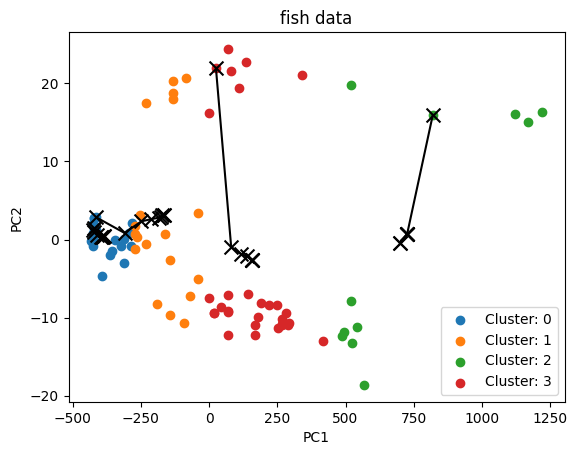

In [16]:
plt.figure()
for k in range(K):
    plt.scatter(X_reduc[cluster_assignments==k,0], X_reduc[cluster_assignments==k,1], label=f"Cluster: {k}")

for i in range(iters+1):
    plt.scatter(centroids_reduc[i,:,0],centroids_reduc[i,:,1], marker="x", color="k", s=100)

for i in range(iters):
    for j in range(K):
        plt.plot([centroids_reduc[i,j,0],centroids_reduc[i+1,j,0]], [centroids_reduc[i,j,1],centroids_reduc[i+1,j,1]], c="k")

# plt.axis("scaled") # toggle on/off to see effect of poor scaling
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("fish data")
plt.show()

In [17]:
# clustering allocation very different from class allocation

# Centre and normalize the fish dataset

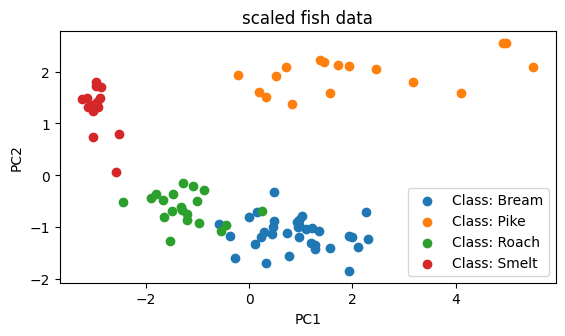

In [18]:
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

# re-train PCA
pca = PCA(n_components=2)
X_reduc = pca.fit_transform(X)

# plot data with labels
plt.figure()
for lab in np.unique(y):
    plt.scatter(X_reduc[y==lab,0], X_reduc[y==lab,1], label=f"Class: {lab}")
plt.legend()
plt.axis("scaled") # toggle on/off to see effect of scaling
plt.title("scaled fish data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# cluster again using normalized data

In [19]:
centroids, cluster_assignments, iters, loss = K_Means(K, X, max_iter = 100) 

# put centroids into 2d space
centroids_reduc = np.zeros([centroids.shape[0],centroids.shape[1],2])
for i in range(iters+1):
    centroids_reduc[i] = pca.transform(centroids[i])

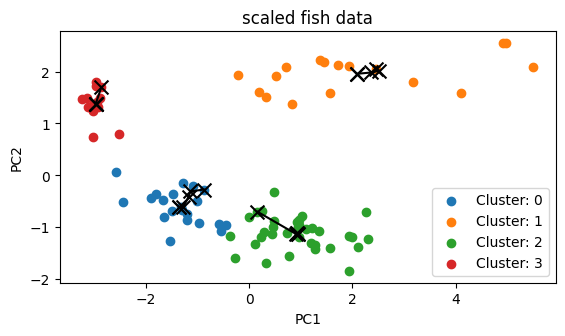

In [20]:
#plot the clusters and their centroids
plt.figure()
for k in range(K):
    plt.scatter(X_reduc[cluster_assignments==k,0], X_reduc[cluster_assignments==k,1], label=f"Cluster: {k}")

for i in range(iters+1):
    plt.scatter(centroids_reduc[i,:,0],centroids_reduc[i,:,1], marker="x", color="k", s=100)

for i in range(iters):
    for j in range(K):
        plt.plot([centroids_reduc[i,j,0],centroids_reduc[i+1,j,0]], [centroids_reduc[i,j,1],centroids_reduc[i+1,j,1]], c="k")

plt.axis("scaled") # toggle on/off
plt.title("scaled fish data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [ ]:
# clustering result is much closer to original labels